# 혼공머 02-1
> 훈련 세트와 테스트 세트

- toc:true
- branch: master
- badges: true
- comments: true
- author: 김동준
- categories : ["Python", "혼공머"]

# 주로쓰는 패키지들

In [1]:
import numpy as np #넘파이
import pandas as pd #판다스
from plotnine import *  #플롯나인
import matplotlib.pyplot as plt #맷플랏립
import plotly.express as px #플랏리 상호작용 그래프
from IPython.display import HTML #블로그에 html로 올리려고 변환하는 패키지
import seaborn as sns # 씨본, 히스토그램 깔끔하게 그리는 패키지
from sklearn.neighbors import KNeighborsClassifier

# 지도학습과 비지도학습
> 지도학습 : 훈련하기 위한 데이터와 정답이 필요

> 비지도학습 : 타깃없이 입력데이터만 사용

>> 훈련데이터 = 입력 + 타깃

## 리스트 준비

In [2]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

## 2차원 리스트 생성

In [5]:
fish_data = [[l,w] for l, w in zip(fish_length, fish_weight)]

In [6]:
fish_target = [1]*35 + [0]*14

## 인덱스 지정

In [7]:
kn = KNeighborsClassifier()

In [9]:
print(fish_data[0:5])  # 슬라이싱 출력

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0]]


In [10]:
#훈련 세트로 입력값 중 0부터 34번째 인덱스까지 사용
train_input = fish_data[:35]
#훈련 세트로 타깃값 중 0부터 34번째 인덱스까지 사용
train_target = fish_target[:35]
#테스트 세트로 입력값 중 35번째부터 마지막 인덱스까지 사용
test_input = fish_data[35:]
#테스트 세트로 타깃값 중 35번째부터 마지막 인덱스까지 사용
test_target = fish_target[35:]

In [12]:
kn = kn.fit(train_input, train_target)  # 훈련 세트로 fit 이용
kn.score(test_input,test_target) # 테스트 세트로 score 이용

0.0

> 34번째 까지 방어니까 제대로된 훈련데이터가 아님 $ \to $ 샘플링 편향

## 다시 인덱스를 랜덤으로 지정

In [13]:
input_arr = np.array(fish_data) 
target_arr = np.array(fish_target) 

In [15]:
# hide
print(input_arr)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]


In [17]:
print(input_arr.shape)  # shape : (샘플수 , 특성수)

(49, 2)


### 타깃은 샘플과 함께 이동해야 한다. (인덱스를 기억하는 것이 중요, 그냥 랜덤으로 섞어도 됨)

In [19]:
np.random.seed(42)
index = np.arange(49)
np.random.shuffle(index)

In [20]:
print(index)

[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


### 랜덤하게 35개 샘플을 훈련 세트로 만들기

In [21]:
train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]

### 나머지로 테스트 세트 만들기 

In [22]:
test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

### 잘 섞인지 산점도로 보기

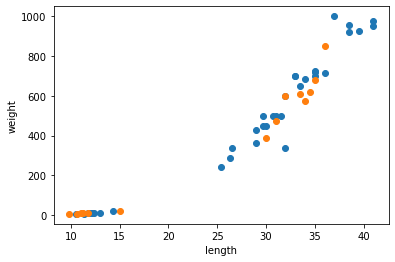

In [24]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(test_input[:,0], test_input[:,1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

> 파란색 : 훈련세트, 주황색 : 테스트세트

# 두 번째 머신러닝 프로그램

In [26]:
kn = kn.fit(train_input,train_target)

In [27]:
kn.score(test_input,test_target)

1.0

> 정확도 100%

### 정확도 확인

In [28]:
kn.predict(test_input)

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

In [29]:
test_target

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

> 정확히 일치

> 훈련할 때 들어 있지 않은 샘플로 테스트 했기 때문에 올바르게 평가한 것!